In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl

In [2]:
data = pl.read_excel("../41591_2015_BFnm3954_MOESM10_ESM.xlsx", sheet_name="PCT raw data")

# list all the sheets in the excel file
data = pd.ExcelFile("../41591_2015_BFnm3954_MOESM10_ESM.xlsx")
data.sheet_names

['RNAseq_fpkm',
 'copy number',
 'pdxe_mut_and_cn2',
 'PCT raw data',
 'PCT curve metrics']

In [3]:
data = pd.read_excel("../41591_2015_BFnm3954_MOESM10_ESM.xlsx", sheet_name="PCT raw data")
data.head()

# convert data into pandas file then a csv file and save it
# data.to_csv("data.csv", index=False)

,Model,Tumor Type,Treatment,Volume (mm3),body weight (g),Days Post T0,% TVol Difference,% BW Difference
0,X-007,GC,BGJ398,202.3,21.5,0,0.0,0.0
1,X-007,GC,BGJ398,590.3,23.0,4,191.8,7.0
2,X-007,GC,BGJ398,796.3,22.7,7,293.6,5.6
3,X-007,GC,BGJ398,1004.5,23.4,11,396.5,8.8
4,X-007,GC,BKM120,288.8,20.4,0,0.0,0.0


In [4]:
len(data['Model'].unique())

277

In [5]:
matrix_df = data.pivot_table(index='Model', columns='Treatment', values='% TVol Difference', aggfunc='mean')

# Display the first few rows of the matrix to get a sense of its structure
matrix_df.head()

Treatment,5FU,BGJ398,BKM120,BKM120 + LDE225,BKM120 + LJC049,BKM120 + binimetinib,BKM120 + encorafenib,BYL719,BYL719 + HSP990,BYL719 + LEE011,...,erlotinib,everolimus,"figitumumab""","figitumumab"" + binimetinib",gemcitabine-50mpk,paclitaxel,tamoxifen,trametinib,trastuzumab,untreated
Model,,,,,,,,,,,,,,,,,,,,,
X-007,NaN,220.475000,99.460000,NaN,NaN,NaN,NaN,196.175000,43.670000,NaN,...,NaN,149.850000,153.550000,NaN,NaN,NaN,NaN,NaN,168.820000,NaN
X-010,NaN,19.734286,124.765000,NaN,NaN,NaN,NaN,106.081818,42.808000,NaN,...,NaN,134.590909,110.360000,NaN,NaN,NaN,NaN,NaN,217.469231,147.230000
X-011,NaN,96.587500,248.293333,NaN,NaN,NaN,NaN,240.926667,117.225000,NaN,...,NaN,44.655556,71.700000,NaN,NaN,NaN,NaN,NaN,190.150000,NaN
X-015,NaN,296.215385,166.085714,NaN,NaN,NaN,NaN,76.083333,108.450000,NaN,...,NaN,121.692857,110.875000,NaN,NaN,NaN,NaN,NaN,208.204167,237.218750
X-017,NaN,-22.224242,101.640000,NaN,NaN,NaN,NaN,61.028571,59.091304,NaN,...,NaN,85.186667,140.276923,NaN,NaN,NaN,NaN,NaN,174.114286,78.977778


In [6]:
matrix_df

Treatment,5FU,BGJ398,BKM120,BKM120 + LDE225,BKM120 + LJC049,BKM120 + binimetinib,BKM120 + encorafenib,BYL719,BYL719 + HSP990,BYL719 + LEE011,...,erlotinib,everolimus,"figitumumab""","figitumumab"" + binimetinib",gemcitabine-50mpk,paclitaxel,tamoxifen,trametinib,trastuzumab,untreated
Model,,,,,,,,,,,,,,,,,,,,,
X-007,NaN,220.475000,99.460000,NaN,NaN,NaN,NaN,196.175000,43.670000,NaN,...,NaN,149.850000,153.550000,NaN,NaN,NaN,NaN,NaN,168.820000,NaN
X-010,NaN,19.734286,124.765000,NaN,NaN,NaN,NaN,106.081818,42.808000,NaN,...,NaN,134.590909,110.360000,NaN,NaN,NaN,NaN,NaN,217.469231,147.230000
X-011,NaN,96.587500,248.293333,NaN,NaN,NaN,NaN,240.926667,117.225000,NaN,...,NaN,44.655556,71.700000,NaN,NaN,NaN,NaN,NaN,190.150000,NaN
X-015,NaN,296.215385,166.085714,NaN,NaN,NaN,NaN,76.083333,108.450000,NaN,...,NaN,121.692857,110.875000,NaN,NaN,NaN,NaN,NaN,208.204167,237.218750
X-017,NaN,-22.224242,101.640000,NaN,NaN,NaN,NaN,61.028571,59.091304,NaN,...,NaN,85.186667,140.276923,NaN,NaN,NaN,NaN,NaN,174.114286,78.977778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X-5536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X-5541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X-5578,188.842857,NaN,32.012500,NaN,-5.58,NaN,NaN,178.368750,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.287500


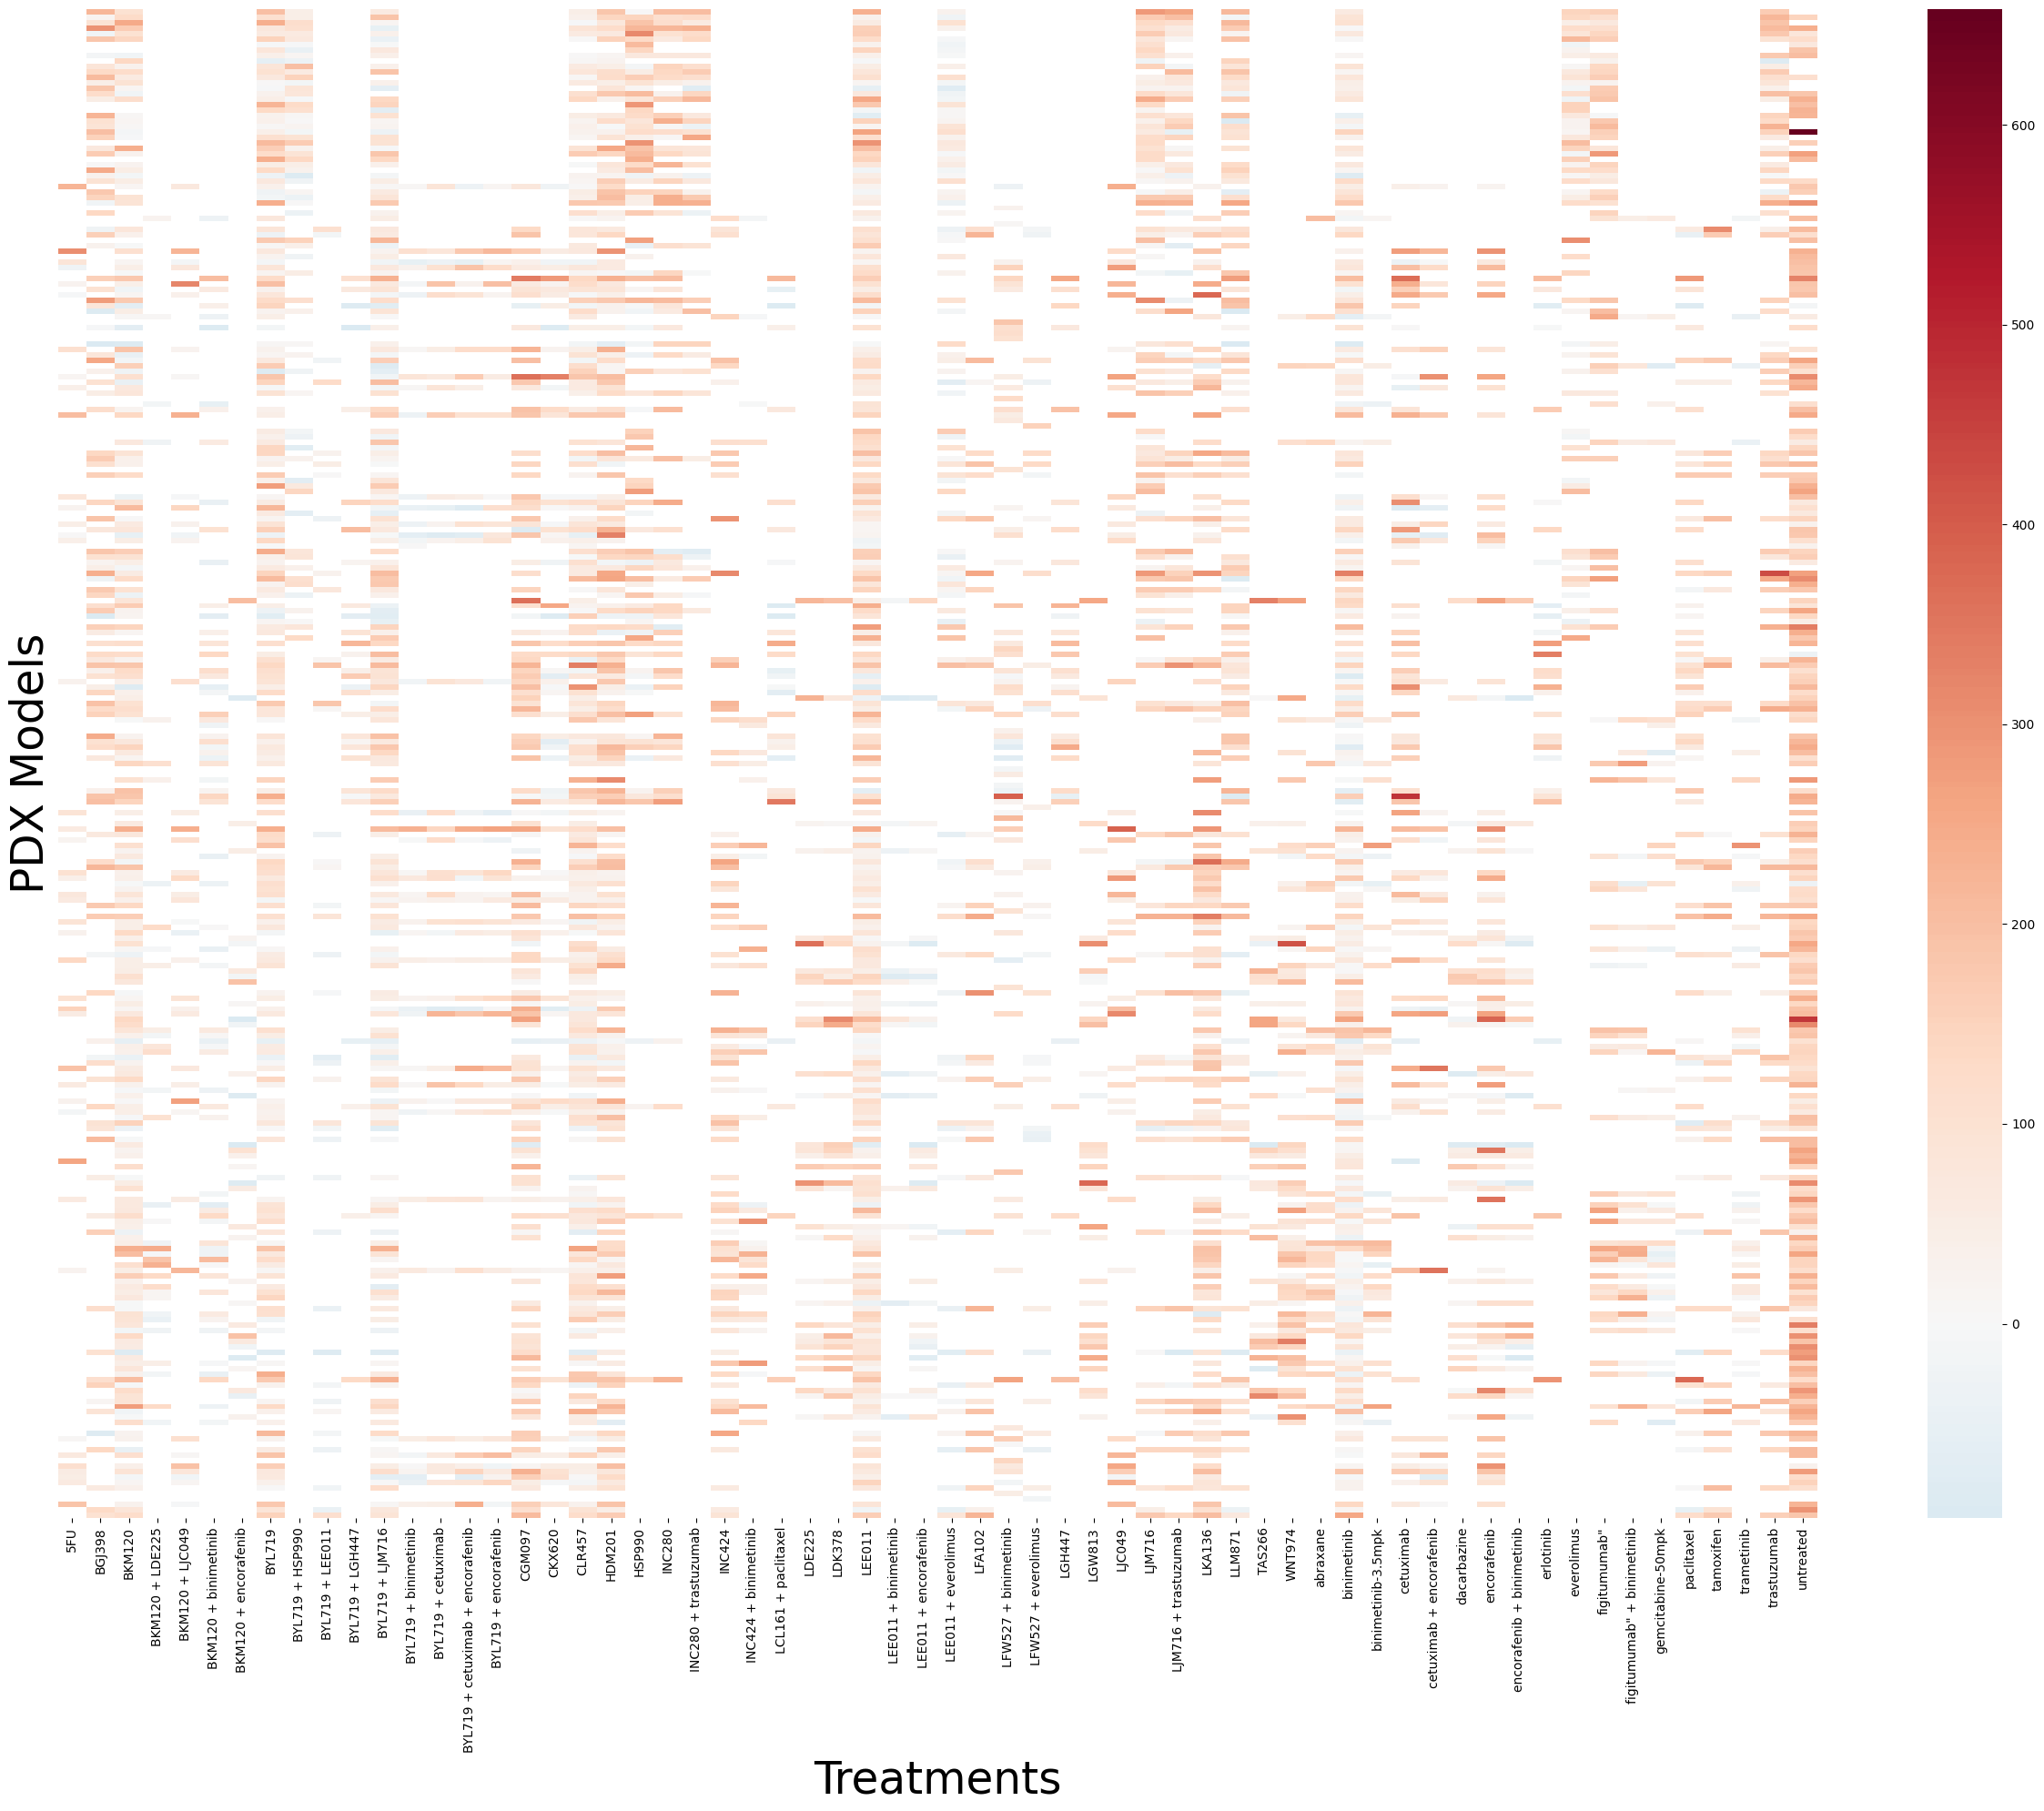

In [7]:
# Improve the heatmap's readability and aesthetics without clustering

# 1. Remove Annotations
# 2. Adjust Color Palette: Using a diverging color palette to emphasize high and low values
# 3. Increase Figure Size

import seaborn as sns

plt.figure(figsize=(25, 20))

# Generating the heatmap without annotations
ax = sns.heatmap(matrix_df, cmap="RdBu_r", center=0, cbar=True, yticklabels=False, xticklabels=True)

# plt.title("Heatmap of PDX Models vs. Treatments (% TVol Difference)", fontsize=35)
# the size of the title and the labels should be bigger
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
plt.xlabel("Treatments", fontsize=35)
plt.ylabel("PDX Models", fontsize=35)
# plt.xlabel("Treatments")
# plt.ylabel("PDX Models")
plt.xticks(rotation=90)
plt.tight_layout()

# save the figure
plt.savefig("heatmap.png", dpi=300)
plt.show()


In [9]:
# Import necessary libraries
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

def compute_growth_percentage(group):
    try:
        start_row = group[group['Days Post T0'] == group['Days Post T0'].min()]
        end_row = group[group['Days Post T0'] == group['Days Post T0'].max()]

        start_volume = start_row['Volume (mm3)'].values[0]
        end_volume = end_row['Volume (mm3)'].values[0]

        return ((end_volume - start_volume) / start_volume) * 100

    except Exception as e:
        print(f"Error with group:\n{group}\nError message: {e}")
        return None

# Calculate % Growth for each PDX-treatment combination
heatmap_data = data.groupby(['Model', 'Treatment']).apply(compute_growth_percentage).unstack()

fig = go.Figure(data=go.Heatmap(z=heatmap_data.values, 
                                x=heatmap_data.columns, 
                                y=heatmap_data.index, 
                                colorscale='Viridis'))



# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='heatmap',
        figure={
            'data': [go.Heatmap(z=heatmap_data.values, x=heatmap_data.columns, y=heatmap_data.index, colorscale='Viridis')],
            'layout': go.Layout(
                title='PDX-Treatment Heatmap', 
                height=950,
                width=1200,
                xaxis=dict(
                    tickangle=-45, 
                    tickvals=list(range(len(heatmap_data.columns))),  # Ensuring every column has a tick
                    ticktext=heatmap_data.columns,  # The text for each tick
                    tickfont=dict(size=10),  # Making the font size smaller
                    title_standoff=30  # Increasing distance between x-axis and labels
                )
            )
        }
    ),
    html.Div(style={"height": "30px"}),  # Use a Div for more precise spacing
    dcc.Graph(id='line-plot', figure={})
])




# Define callback to update line-plot based on heatmap selection
@app.callback(
    Output('line-plot', 'figure'),
    [Input('heatmap', 'clickData')]
)
def update_side_panel(clickData):
    if clickData is None:
        return go.Figure()
    
    # Extract clicked model and treatment
    model = clickData['points'][0]['y']
    treatment = clickData['points'][0]['x']
    
    # Filter data
    subset = data[(data['Model'] == model) & (data['Treatment'] == treatment)]
    
    # Create line plot
    figure = {
        'data': [go.Scatter(x=subset['Days Post T0'], y=subset['Volume (mm3)'], mode='lines+markers')],
        'layout': go.Layout(
            title=f'Tumor Volume Over Time ({model} - {treatment})',
            xaxis_title="Days Post T0",
            yaxis_title="Tumor Volume (mm³)"
        )
    }
    
    return figure



app.run_server(mode='inline')


In [38]:
num_rows_heatmap = heatmap_data.shape[0]
num_rows_heatmap

277

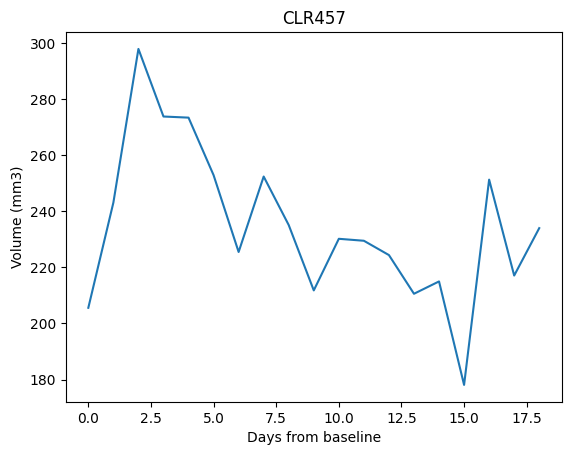

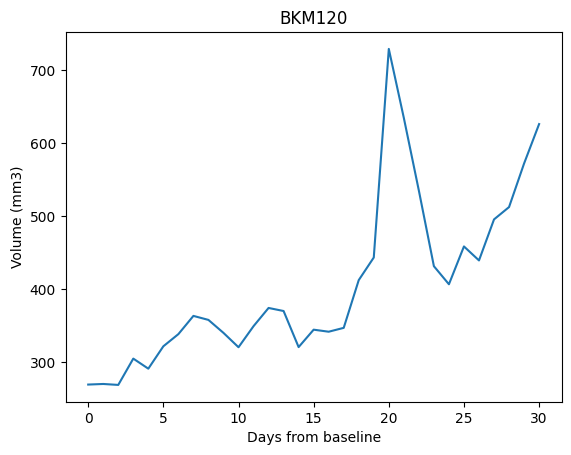

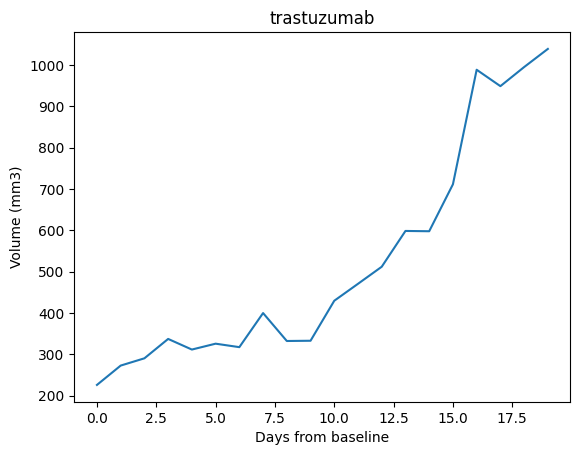

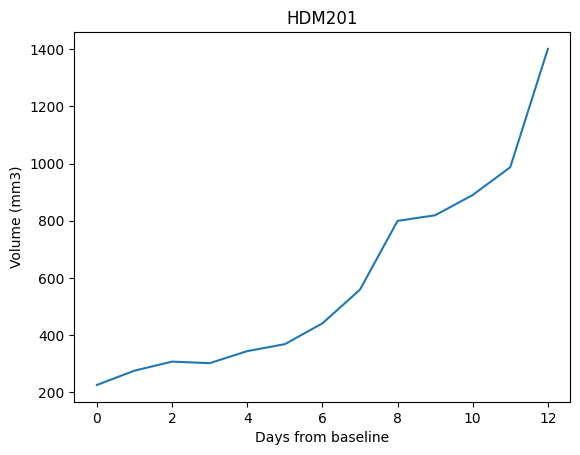

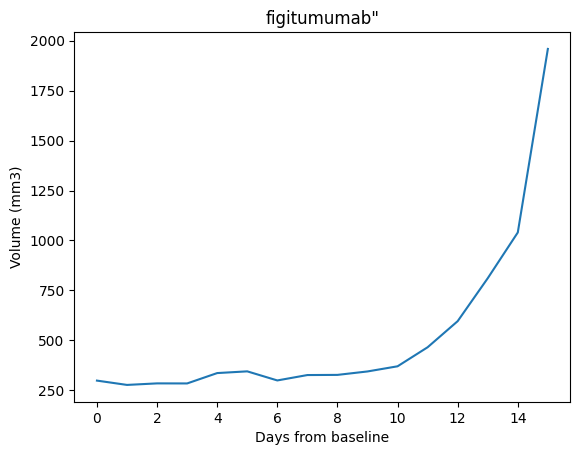

In [25]:
data = pl.read_excel("../41591_2015_BFnm3954_MOESM10_ESM.xlsx", sheet_name="PCT raw data")

# choosing a single combination of Tumor Type and Model
data2 = (data.filter(pl.col("Tumor Type") == "GC")).filter(pl.col("Model") == "X-091")

# see how different treatments progress over time for the same tumor type
for i, treatment in enumerate(data2['Treatment'].unique()):
    if i < 5:
        data3 = data2.filter(pl.col('Treatment') == treatment)
        plt.plot(data3['Volume (mm3)'])
        # plt.title(f'Model: {model}, Treatment: BGJ398, Tumor Type: GC')
        plt.title(treatment)
        plt.xlabel('Days from baseline')
        plt.ylabel('Volume (mm3)')
        plt.show()
    else:
        break

In [28]:
data3 = data2.filter(pl.col('Treatment') == "HDM201")
    
from hmmlearn import hmm

# Set up the initial transition matrix with the known constraint. here, the second row
# is to indicate that once we transition to state 1, we will stay in state 1, which is the unresponsive state
transmat_prior = np.array([[0.5, 0.5],
                           [0.0, 1.0]])

# Create an HMM with Gaussian emissions and two hidden states
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000, init_params='smc')
model.transmat_ = transmat_prior

# Fit the model to the data
model.fit(data3['Volume (mm3)'].to_numpy().reshape(-1, 1))

# Predict the hidden states
hidden_states_predicted = model.predict(data3['Volume (mm3)'].to_numpy().reshape(-1, 1))
hidden_states_predicted

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

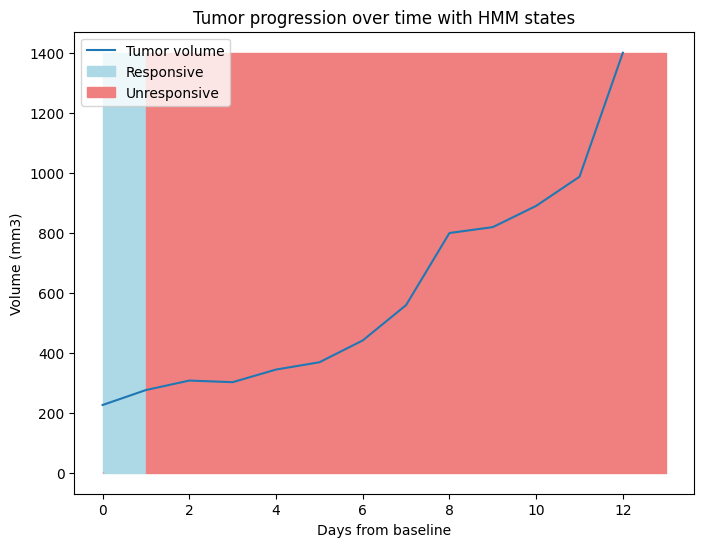

In [29]:
# Plot the progression over time

plt.figure(figsize=(8, 6))
plt.plot(data3['Volume (mm3)'], label="Tumor volume")

# Fill regions based on the hidden states
days = np.arange(len(data3['Volume (mm3)']))
for i, state in enumerate(hidden_states_predicted):
    if state == 0:
        plt.fill_between([i, i+1], 0, max(data3['Volume (mm3)']), color='lightblue')
    else:
        plt.fill_between([i, i+1], 0, max(data3['Volume (mm3)']), color='lightcoral')

# Dummy fills for the legend
plt.fill_between([0, 0], 0, 1, color='lightblue', label='Responsive')
plt.fill_between([0, 0], 0, 1, color='lightcoral', label='Unresponsive')

plt.title("Tumor progression over time with HMM states")
plt.xlabel('Days from baseline')
plt.ylabel('Volume (mm3)')
plt.legend()
plt.show()


I am not sure this is the right way to use the HMMs in this context. Does the cutoff we got from the HMM predictions make sense in our case? I also have some other questions related to how we get the hidden states and if we should place a constrant on the transition matrix to say that, once we get to the unresposnive state, we just stay there.

After we get the hidden states of each time point using the HMM, we then create a separate autoregressive model for both the responsive and unresponsive states. For the autoregressive model, I am just using a simple autoregressive model with lag one (the value at time $t$ only depends on the immediate previous value).

$$y_t = \mu + \phi y_{t-1} + \epsilon_t$$

For this, to start off, I am using a non probabilistic model from `statsmodel`. After this, we use MCMC sampler with a normal likelihood to get variance in our predictions. For now, I'm just doing it for the state where it's unresponsive.

In [32]:
from statsmodels.tsa.ar_model import AutoReg

# Split the data based on the predicted hidden states
data_state1 = data3['Volume (mm3)'].to_numpy()[hidden_states_predicted == 1]  # unresponsive
data_state0 = data3['Volume (mm3)'].to_numpy()[hidden_states_predicted == 0]

# Fit an autoregressive model to each subset
ar_model_state1 = AutoReg(data_state1, lags=1).fit()
# ar_model_state0 = AutoReg(data_state0, lags=1).fit()

# see the results -- the coefficients of the AR model
print(f'mu: {ar_model_state1.params[0]}\nphi: {ar_model_state1.params[1]}')


mu: -40.563928072010825
phi: 1.2578480233648028


After this, I get the predicted data from the autoregressive model for the unresponsive state and plot it on top of the actual data to see the difference

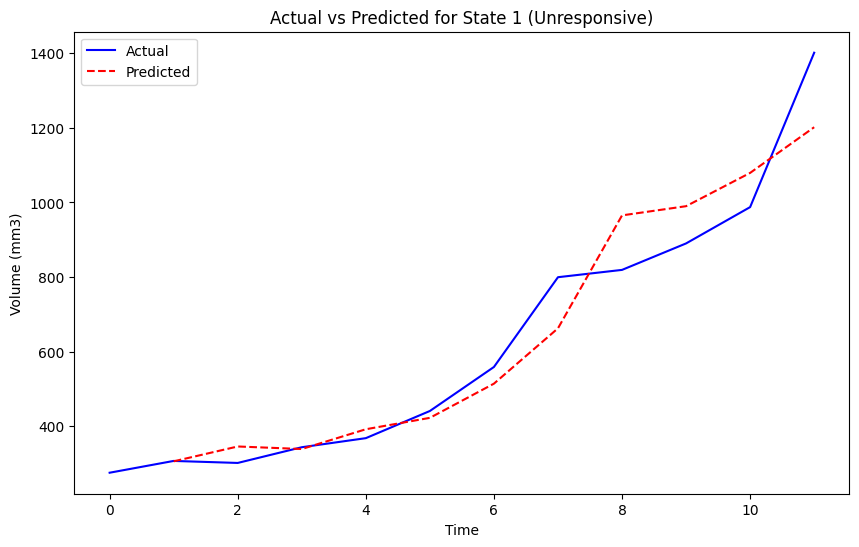

In [33]:
# Get the predicted values
predicted_data = ar_model_state1.predict(start=1, end=len(data_state1)-1, dynamic=False)

# Create the adjusted time indices for the predicted data
predicted_indices = np.arange(1, len(data_state1))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_state1, label='Actual', color='blue')
plt.plot(predicted_indices, predicted_data, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted for State 1 (Unresponsive)')
plt.xlabel('Time')
plt.ylabel('Volume (mm3)')
plt.legend()
plt.show()


I then used `Pyro`'s SVI algorithm to see if the results are close to the ones from `statsmodel`

In [75]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
from pyro.infer.autoguide import AutoDiagonalNormal


def ar1_model(data_state1):
    y_t_minus_1 = data_state1[:-1]
    
    # Prior distributions
    phi = pyro.sample('phi', dist.Normal(0, 10))
    mu = pyro.sample('mu', dist.Normal(0, 10))
    sigma = pyro.sample('sigma', dist.HalfNormal(10))
    
    # Likelihood
    with pyro.plate('observed_data', len(data_state1) - 1):
        pyro.sample('y_t', dist.Normal(mu + phi * y_t_minus_1, sigma), obs=data_state1[1:])

# Use an AutoGuide
guide = AutoDiagonalNormal(ar1_model)

# Convert data_state1 to torch tensor
data_state1_torch = torch.tensor(data_state1, dtype=torch.float32)

pyro.clear_param_store()
svi = SVI(model=ar1_model, guide=guide, optim=Adam({"lr": 0.001}), loss=Trace_ELBO())

for step in range(20000):
    svi.step(data_state1_torch)
    if step % 2000 == 0:
        print(f"Step {step}, ELBO: {svi.evaluate_loss(data_state1_torch)}")

# Extract samples
phi_samples = pyro.param('AutoDiagonalNormal.loc')[0].item()
mu_samples = pyro.param('AutoDiagonalNormal.loc')[1].item()
sigma_samples = pyro.param('AutoDiagonalNormal.scale')[2].exp().item()

print(f"Phi: {phi_samples}, Mu: {mu_samples}, Sigma: {sigma_samples}")

Step 0, ELBO: 2571997.454886794
Step 2000, ELBO: 154480.0134651661
Step 4000, ELBO: 33444.50749516487
Step 6000, ELBO: 5549.4285707473755
Step 8000, ELBO: 2301.350330591202
Step 10000, ELBO: 489.5476620197296
Step 12000, ELBO: 157.57962131500244
Step 14000, ELBO: 100.90142297744751
Step 16000, ELBO: 93.8153989315033
Step 18000, ELBO: 93.61584329605103
Phi: 1.1882606744766235, Mu: 6.0457892417907715, Sigma: 1.0787405967712402


I also tried `Pyro`'s MCMC algorithms but I had problems running it. It had problems running the multiple chains, so I just run it with a single chain.

In [58]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS

# Convert data to PyTorch tensor
data_state1_torch = torch.tensor(data_state1, dtype=torch.float32)

def ar1_model_1():
    # create a probabilistic autoregressive model with lag one for the first state (state 0)
    phi = pyro.sample('phi', dist.Normal(0, 10))
    mu = pyro.sample('mu', dist.Normal(0, 10))
    sigma = pyro.sample('sigma', dist.HalfNormal(10))
    
    # likelihood
    with pyro.plate("data", len(data_state1)-1):
        pyro.sample('y_t', dist.Normal(mu + phi * data_state1_torch[:-1], sigma), obs=data_state1_torch[1:])

nuts_kernel = NUTS(ar1_model_1)
mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=1000, num_chains=1)
mcmc.run()
mcmc.summary()

Sample: 100%|██████████| 2000/2000 [00:16, 121.16it/s, step size=7.81e-01, acc. prob=0.877]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu     -2.00      9.36     -1.83    -18.68     11.40    635.75      1.00
       phi      1.20      0.03      1.20      1.15      1.25    702.43      1.01
     sigma     53.43      4.79     53.05     45.21     60.69    934.47      1.00

Number of divergences: 0


Because I couldn't run multiple chains, I used `PyMC` instead to see if the sampler is actually working okay

/Users/hussen/anaconda3/envs/pyro-env/lib/python3.11/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


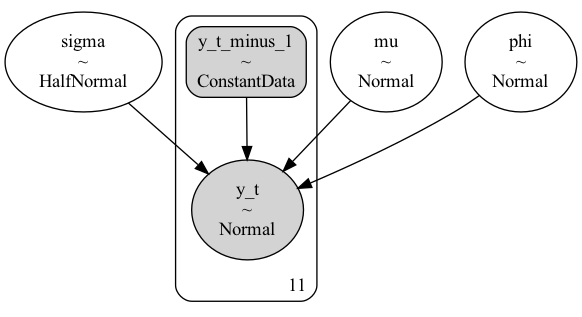

In [59]:
import pymc as pm
import arviz as az

with pm.Model() as ar1_model_1:
    # create a probabilistic autoregressive model with lag one for the state 1 (unresponsive)
    phi = pm.Normal('phi', mu=0, sigma=10)
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)
    y_t_minus_1 = pm.Data('y_t_minus_1', data_state1[:-1])
    
    # likelihood
    y_t = pm.Normal('y_t', mu=mu + phi*y_t_minus_1, sigma=sigma, observed=data_state1[1:])
    

from IPython.display import Image 
Image(pm.model_to_graphviz(ar1_model_1).render(format='png'))


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [phi, mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
phi,1.20,0.03,1.15,1.26,0.00,0.00,3264.41,3233.32,1.0
mu,-2.97,9.71,-20.32,15.09,0.17,0.13,3128.81,3162.15,1.0
sigma,53.59,4.59,44.93,62.04,0.08,0.06,3347.67,2843.85,1.0


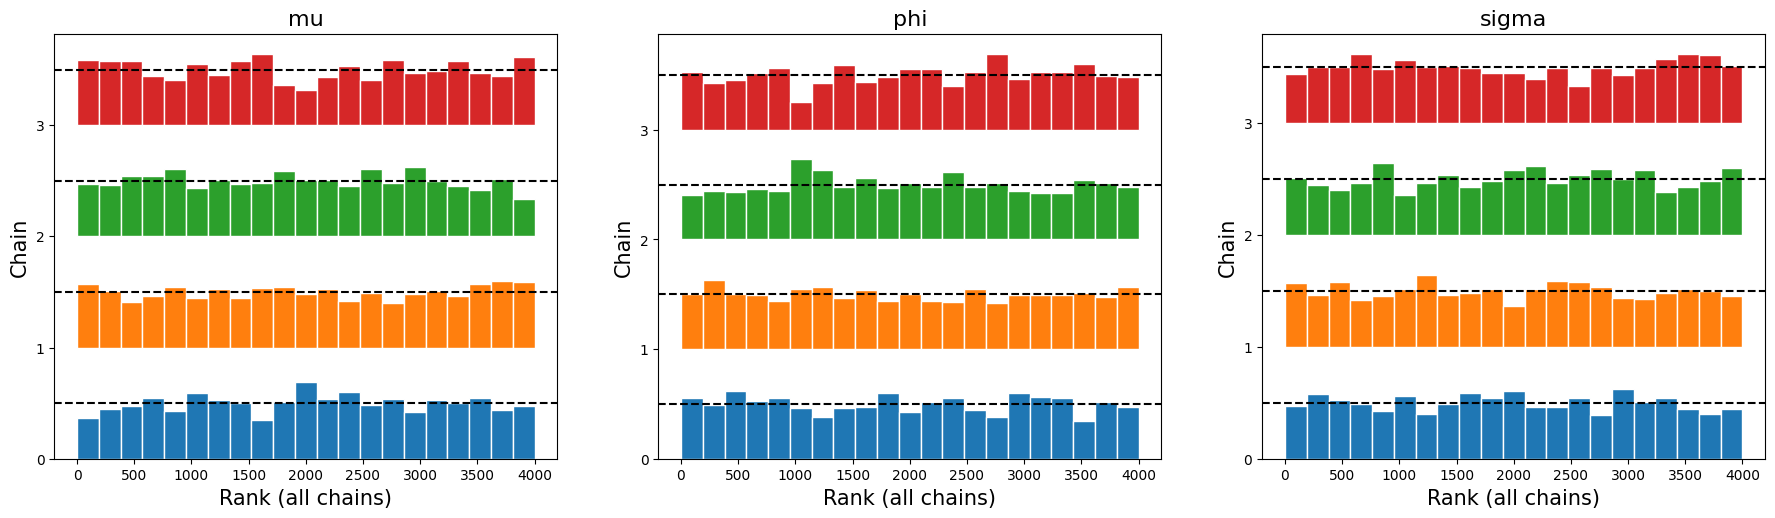

In [62]:
# inference
with ar1_model_1:
    trace_1 = pm.sample(1000, tune=1000, chains=4, cores=1)

display(az.summary(trace_1, round_to=2))
az.plot_rank(trace_1, var_names=['mu', 'phi', 'sigma'])  # to see how the chains behave -- to make sure that our sampler is working well
plt.show()

Sampling: [y_t]


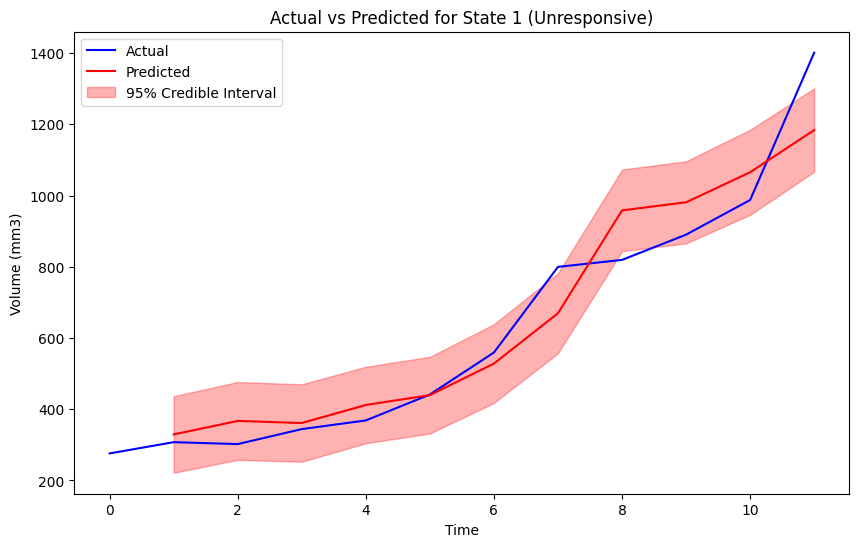

In [73]:
# Generate posterior predictive samples
with ar1_model_1:
    posterior_predictive = pm.sample_posterior_predictive(trace_1, var_names=['y_t'])

# Compute the mean and standard deviation of the posterior predictive samples
ppc_samples = posterior_predictive.posterior_predictive.y_t.values
ppc_mean = np.mean(ppc_samples, axis=(0, 1))
ppc_std = np.std(ppc_samples, axis=(0, 1))


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data_state1, label='Actual', color='blue')
plt.plot(np.arange(1, len(data_state1)), ppc_mean, label='Predicted', color='red')
plt.fill_between(np.arange(1, len(data_state1)), ppc_mean - 2*ppc_std, ppc_mean + 2*ppc_std, color='red', alpha=0.3, label='95% Credible Interval')
plt.title('Actual vs Predicted for State 1 (Unresponsive)')
plt.xlabel('Time')
plt.ylabel('Volume (mm3)')
plt.legend()
plt.show()


### This is not the most polished thing, but I just wanted to get started on it.